**This notebook demonstrates application of the CNOT gate to a 2-qubit system**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

In [1]:
import os, sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools
import tools

# Get a backend
IBMQ.load_accounts()
device = backend_tools.get_device(use_sim=True, min_qubits=2)

$CNOT$ gate in the standard basis is:
$$CNOT = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}
$$

Initial state = |00>


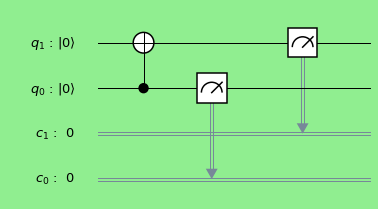

Initial state = |01>


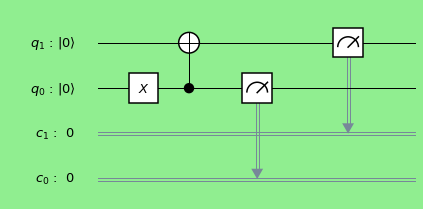

Initial state = |10>


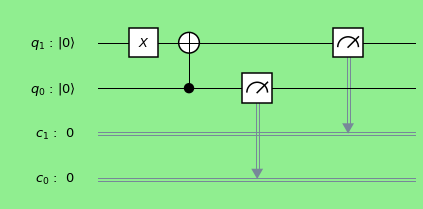

Initial state = |11>


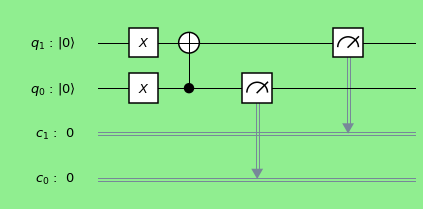

Initial state = |0+>


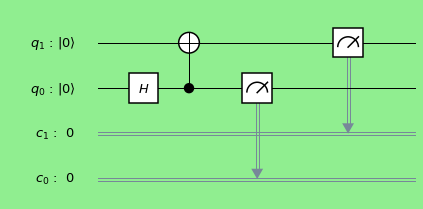

In [2]:
# Define the quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')

circuits = []
titles = []

# Apply CNOT to |00>
circuit = QuantumCircuit(qr, cr)
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("Initial state = |00>")

# Apply CNOT to |01>
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("Initial state = |01>")

# Apply CNOT to |10>
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[1])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("Initial state = |10>")

# Apply CNOT to |11>
circuit = QuantumCircuit(qr, cr)
circuit.x(qr[0])
circuit.x(qr[1])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("Initial state = |11>")

# Apply CNOT to |0+>
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuits.append(circuit)
titles.append("Initial state = |0+>")

# Draw the circuits
%matplotlib inline
style = {'backgroundcolor': 'lightgreen'}
for circuit, label in zip(circuits, titles):
    print(label)
    circuit.draw(output="mpl")
    tools.show_figure(circuit.draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.7))

In [3]:
# Simulate or run the circuit
shots = 1024
job = execute(circuits, backend=device, shots=shots)
result = job.result()

# Output the results
for index, label in enumerate(titles):
    data = result.get_counts(circuits[index])
    try:
        p00 = data['00']/float(shots)
    except KeyError:
        p00 = 0.0
    try:
        p01 = data['01']/float(shots)
    except KeyError:
        p01 = 0.0
    try:
        p10 = data['10']/float(shots)
    except KeyError:
        p10 = 0.0
    try:
        p11 = data['11']/float(shots)
    except KeyError:
        p11 = 0.0
    print("{}, |00> = {:5.3f} |01> = {:5.3f} |10> = {:5.3f} |11> = {:5.3f}".format(label, p00, p01, p10, p11))

Initial state = |00>, |00> = 1.000 |01> = 0.000 |10> = 0.000 |11> = 0.000
Initial state = |01>, |00> = 0.000 |01> = 0.000 |10> = 0.000 |11> = 1.000
Initial state = |10>, |00> = 0.000 |01> = 0.000 |10> = 1.000 |11> = 0.000
Initial state = |11>, |00> = 0.000 |01> = 1.000 |10> = 0.000 |11> = 0.000
Initial state = |0+>, |00> = 0.504 |01> = 0.000 |10> = 0.000 |11> = 0.496


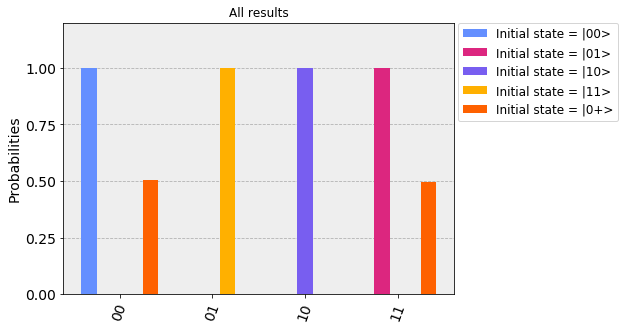

In [4]:
from qiskit.tools.visualization import plot_histogram
all_results = []
for index in range(len(titles)):
    all_results.append(result.get_counts(circuits[index]))
plot_histogram(data=all_results,legend=titles, title="All results", bar_labels=False)